In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Nicholas-Bandy/eportfolio/main/AB_NYC_2019.csv")
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [4]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df.drop(['name','host_name', 'last_review', 'id', 'host_id'],axis = 1)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
df[[ 'latitude', 'longitude',
        'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].skew()

latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.300723
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64

In [8]:
 df[[ 'latitude', 'longitude',
        'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].kurt()

latitude                            0.148845
longitude                           5.021646
price                             585.672879
minimum_nights                    854.071662
number_of_reviews                  19.529788
reviews_per_month                  43.531611
calculated_host_listings_count     67.550888
availability_365                   -0.997534
dtype: float64

In [9]:
df['neighbourhood_code'] = df['neighbourhood'].astype('category').cat.codes
df['neighbourhood_group_code'] = df['neighbourhood_group'].astype('category').cat.codes
df['room_type_code'] = df['room_type'].astype('category').cat.codes

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_code,neighbourhood_group_code,room_type_code
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,108,1,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,127,2,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,94,2,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,41,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,61,2,0


/home/dsousa/.pyenv/versions/3.8.0/envs/venv-3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


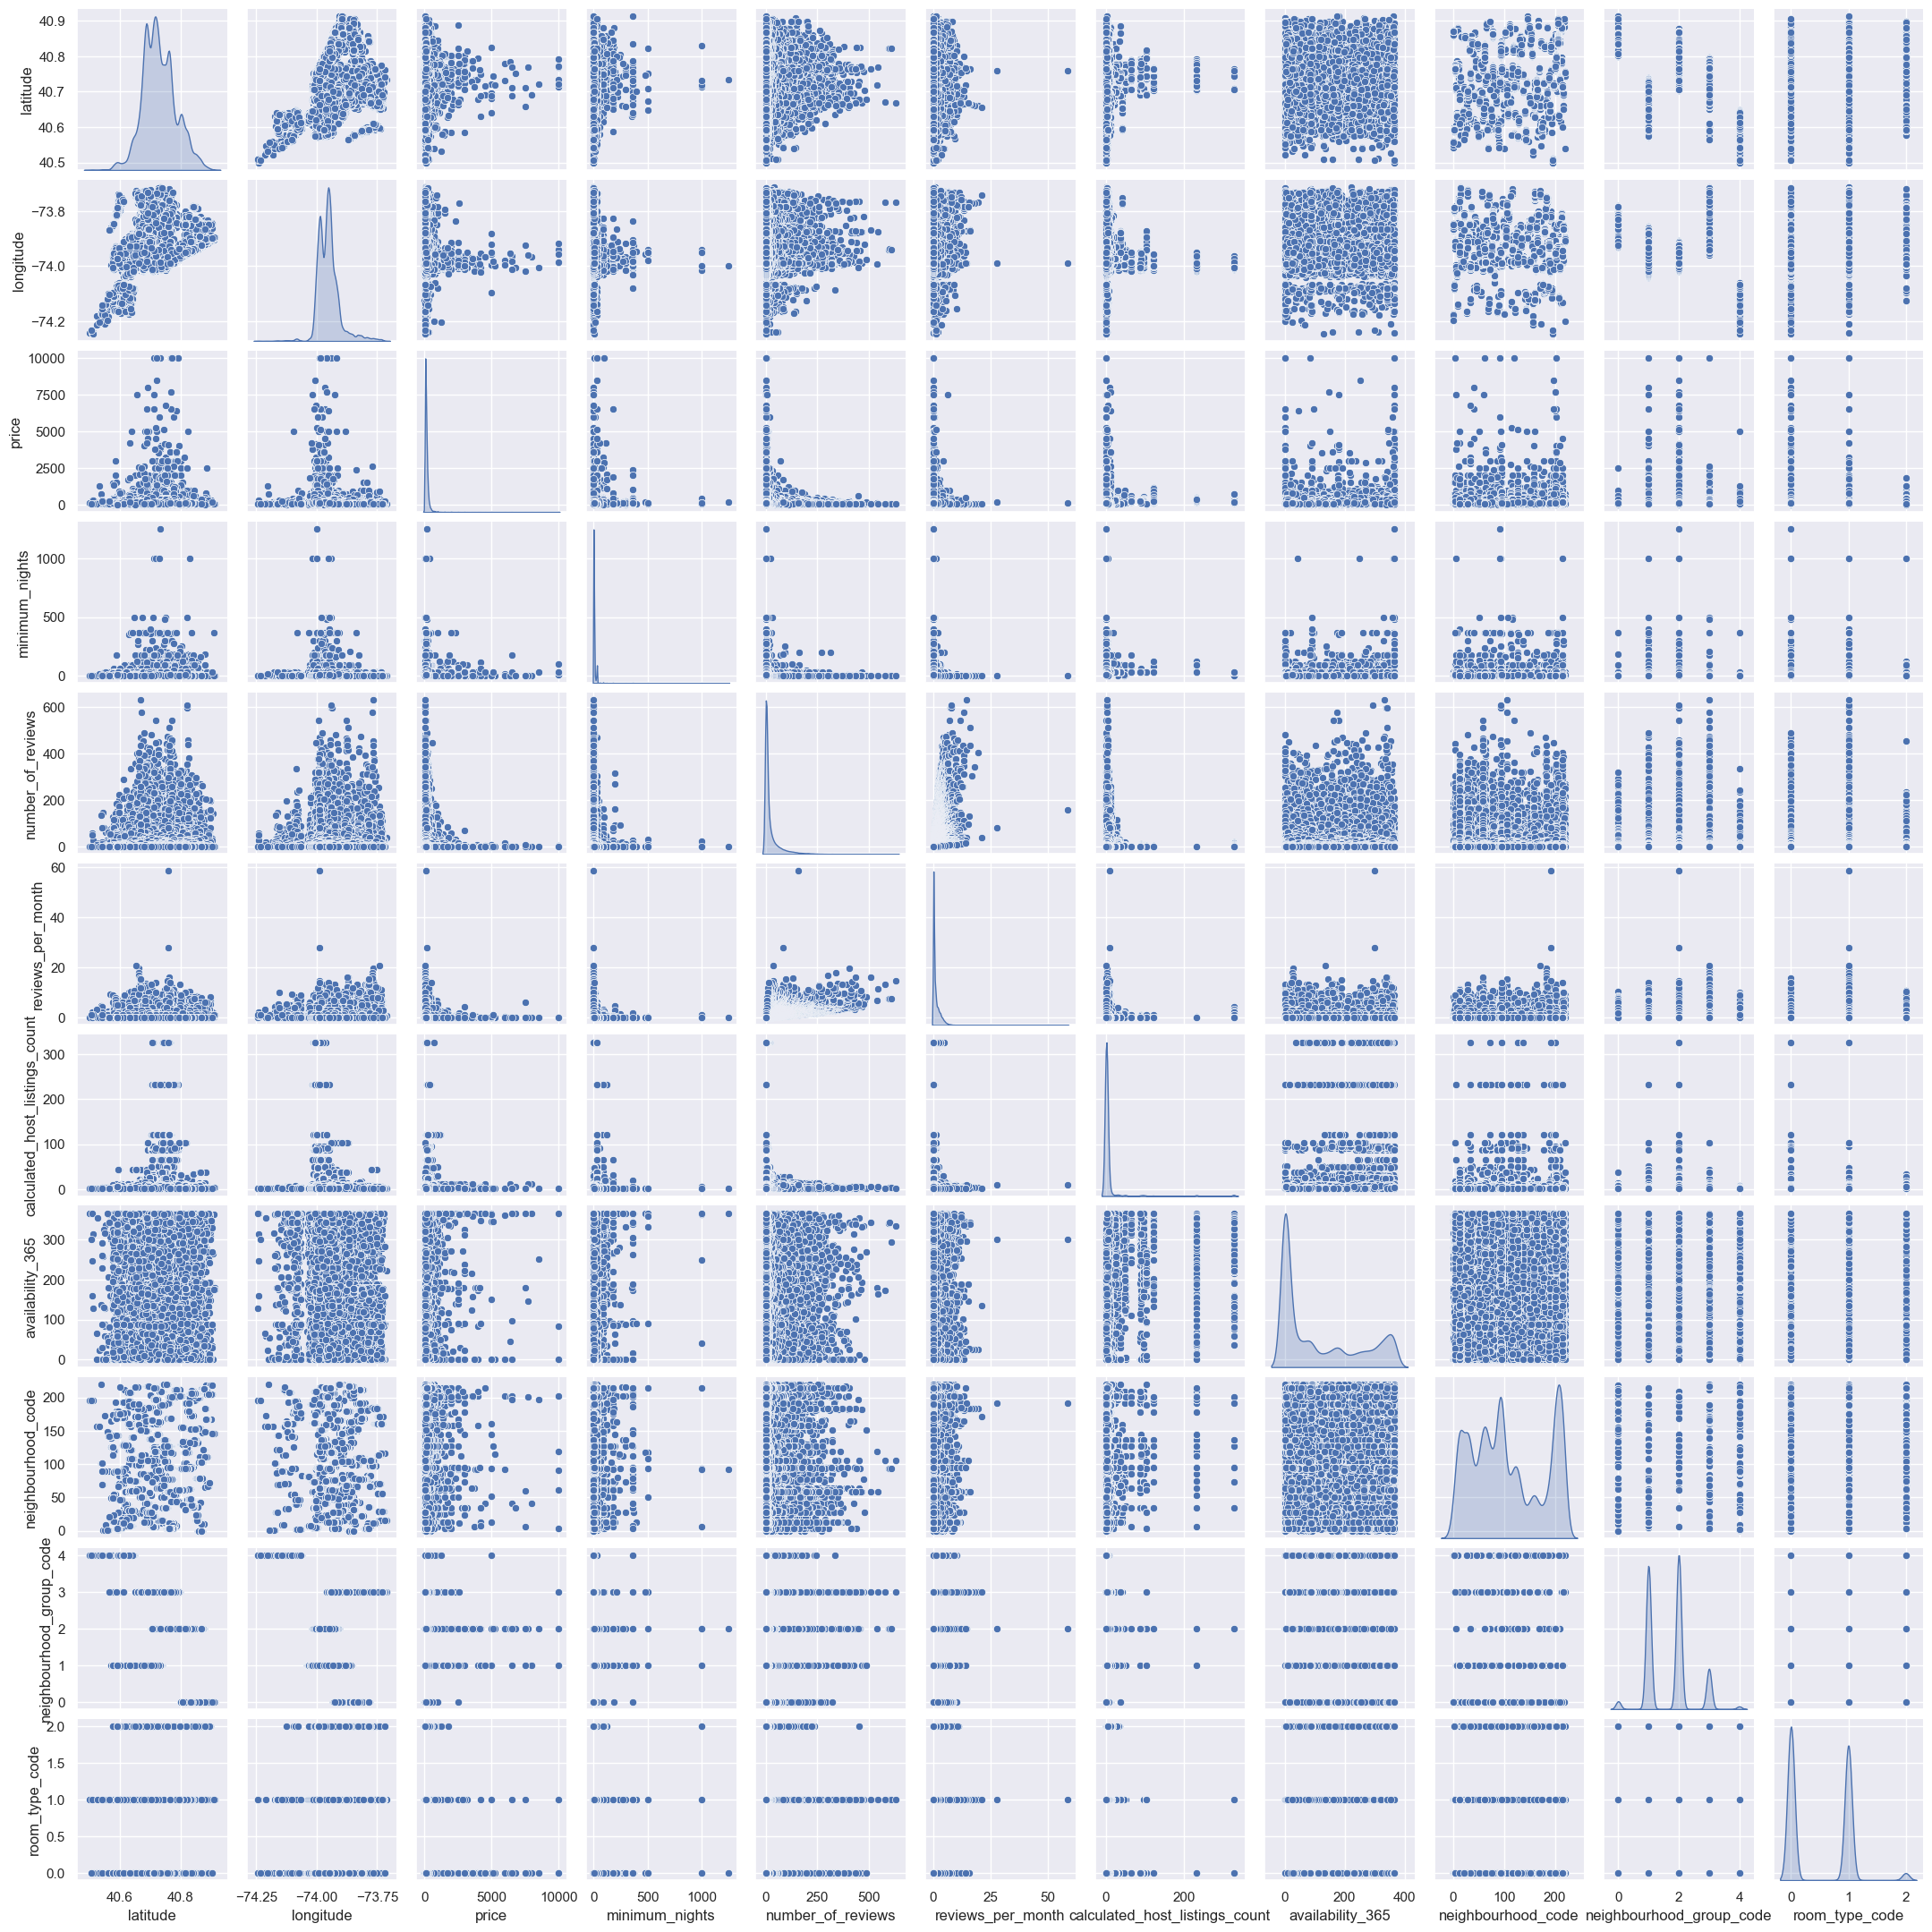

In [10]:
sns.set()
sns.pairplot(df,height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [11]:
maps_df = pd.read_csv("https://raw.githubusercontent.com/Nicholas-Bandy/eportfolio/main/AB_NYC_2019.csv")
maps_df["nights_booked"]= 365 - maps_df["availability_365"]
maps_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,nights_booked
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,171
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,365


In [12]:
maps_df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [13]:
maps_df.groupby('neighbourhood_group')['nights_booked'].mean()

neighbourhood_group
Bronx            199.241063
Brooklyn         264.767708
Manhattan        253.020590
Queens           220.548182
Staten Island    165.321716
Name: nights_booked, dtype: float64

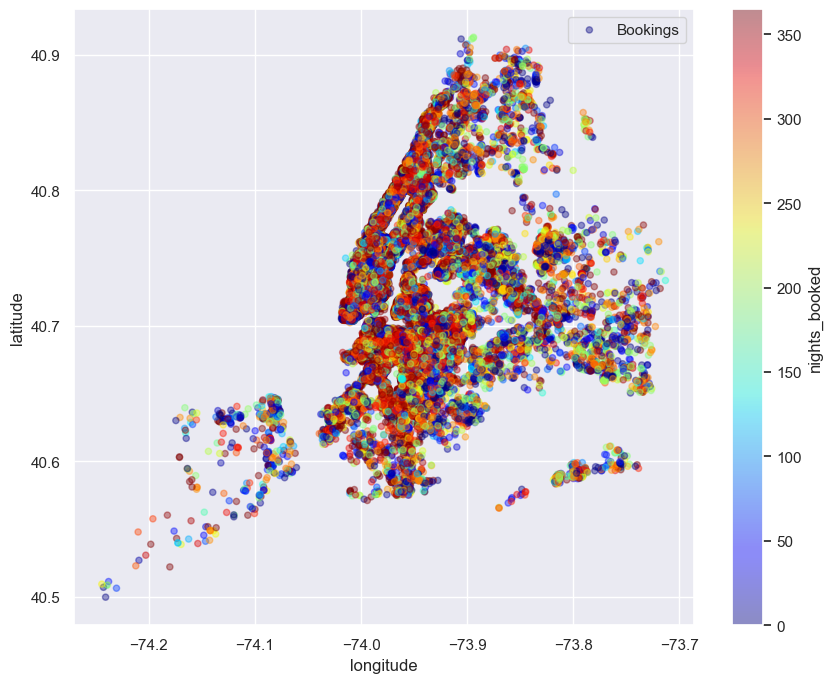

In [14]:
map1 = maps_df.plot(kind='scatter', x='longitude', y='latitude', label='Bookings', c='nights_booked',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))

In [15]:
from PIL import Image

--2023-09-17 17:25:39--  https://raw.githubusercontent.com/Nicholas-Bandy/eportfolio/ca2df1fb7c54c922a58595d088e1ffc432f98f5e/NYC_map.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87105 (85K) [image/png]
Saving to: ‘./input/NYC_map.png’

./input/NYC_map.png 100%[===================>]  85.06K  --.-KB/s    in 0.07s   

2023-09-17 17:25:40 (1.17 MB/s) - ‘./input/NYC_map.png’ saved [87105/87105]



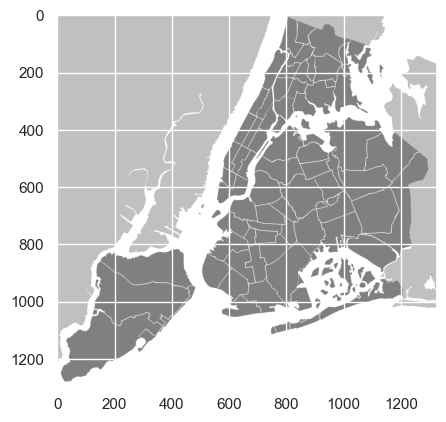

In [16]:
!wget https://raw.githubusercontent.com/Nicholas-Bandy/eportfolio/ca2df1fb7c54c922a58595d088e1ffc432f98f5e/NYC_map.png  -O ./input/NYC_map.png
img = Image.open("./input/NYC_map.png")
plt.imshow(img)

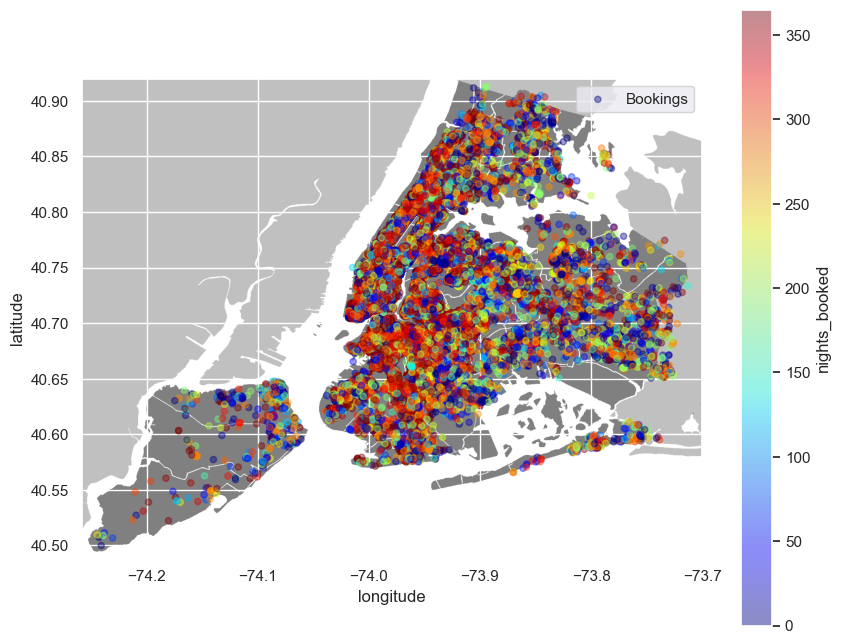

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
maps_df.plot(kind='scatter', x='longitude', y='latitude', label='Bookings', c='nights_booked', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

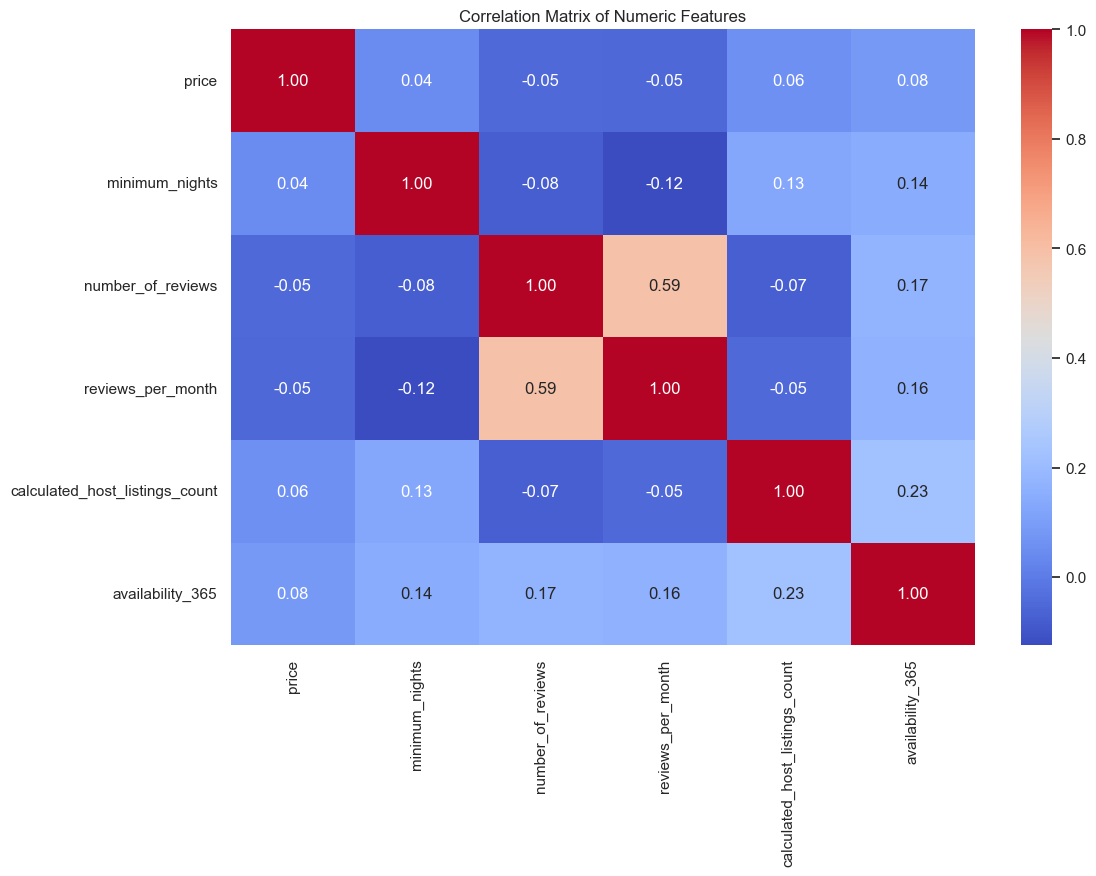

In [18]:
# Calculate the correlation matrix for numeric features

# List of numeric columns to visualize
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [19]:
# Drop missing data
data = pd.read_csv("https://raw.githubusercontent.com/Nicholas-Bandy/eportfolio/main/AB_NYC_2019.csv")

data = data.dropna(axis=1)

# Convert categorical feature to numerical
data =pd.get_dummies(data, columns=['room_type' ], drop_first=False)

data.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [20]:
data.columns = ['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'room_type_entire_home_apt', 'room_type_private_room',
       'room_type_shared_room']



In [21]:
data[['room_type_entire_home_apt', 'room_type_private_room',
       'room_type_shared_room']] = data[['room_type_entire_home_apt', 'room_type_private_room',
       'room_type_shared_room']].astype(int)

In [22]:
# select features for clustering
features = [ 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365',
       'room_type_entire_home_apt', 'room_type_private_room',
       'room_type_shared_room']

X = data[features]

X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_entire_home_apt,room_type_private_room,room_type_shared_room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,1,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,1,0,0
4,40.79851,-73.94399,80,10,9,1,0,1,0,0


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

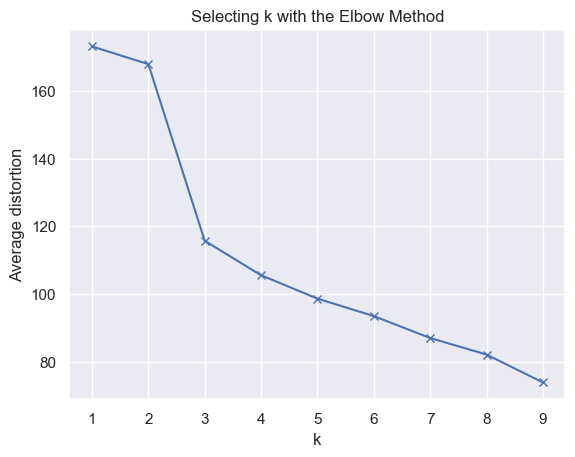

In [23]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, n_init = 15, random_state=55)
    model.fit(X)
    prediction=model.predict(X)
    meanDistortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [24]:
num_clusters = 3

# Initialize K-Means algorithm with 3 clusters, as per the Elbow Method recommendation
kmeans = KMeans(n_clusters=num_clusters, n_init = 15, random_state=55)

# Compute k-means clusters
kmeans.fit(X)

# Transform X to cluster-distance space
prediction=kmeans.predict(X)

# Adding new column to dataframe and assign the cluster number to this column
data['clusters'] = prediction
data['clusters'] = data['clusters'].astype('int64')

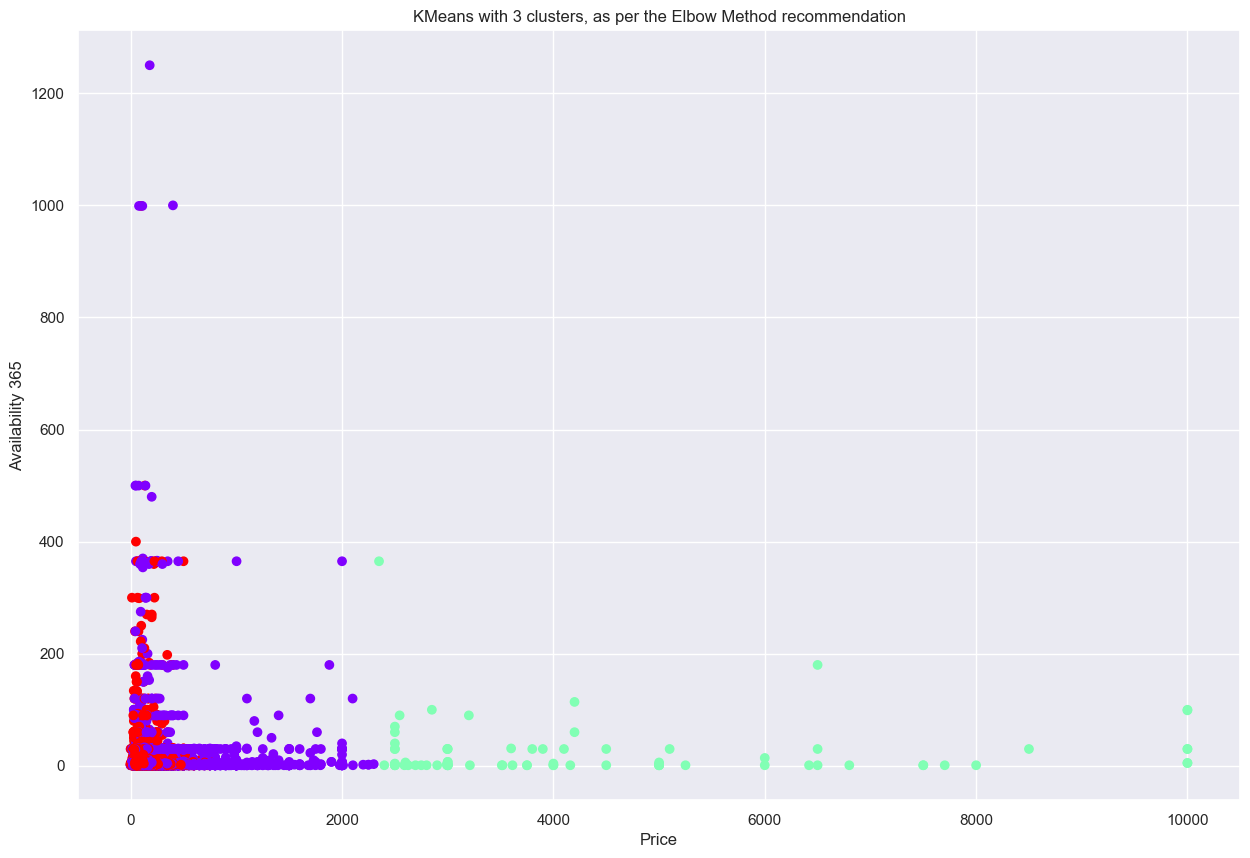

In [25]:

# Visualizing the clustering
plt.figure(figsize =(15, 10))
plt.scatter(X['price'], X['minimum_nights'],
           c = data['clusters'], cmap ='rainbow')

plt.xlabel('Price')
plt.ylabel('Availability 365')
plt.title('KMeans with 3 clusters, as per the Elbow Method recommendation')

plt.show()

In [26]:
k = [2, 3, 4, 5, 6, 7, 8]

from sklearn.cluster import   AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Appending the silhouette scores of the different models to the list
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
ac7 = AgglomerativeClustering(n_clusters = 7)
ac8 = AgglomerativeClustering(n_clusters = 8)

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X, ac2.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac3.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac4.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac5.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac6.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac7.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac8.fit_predict(X)))



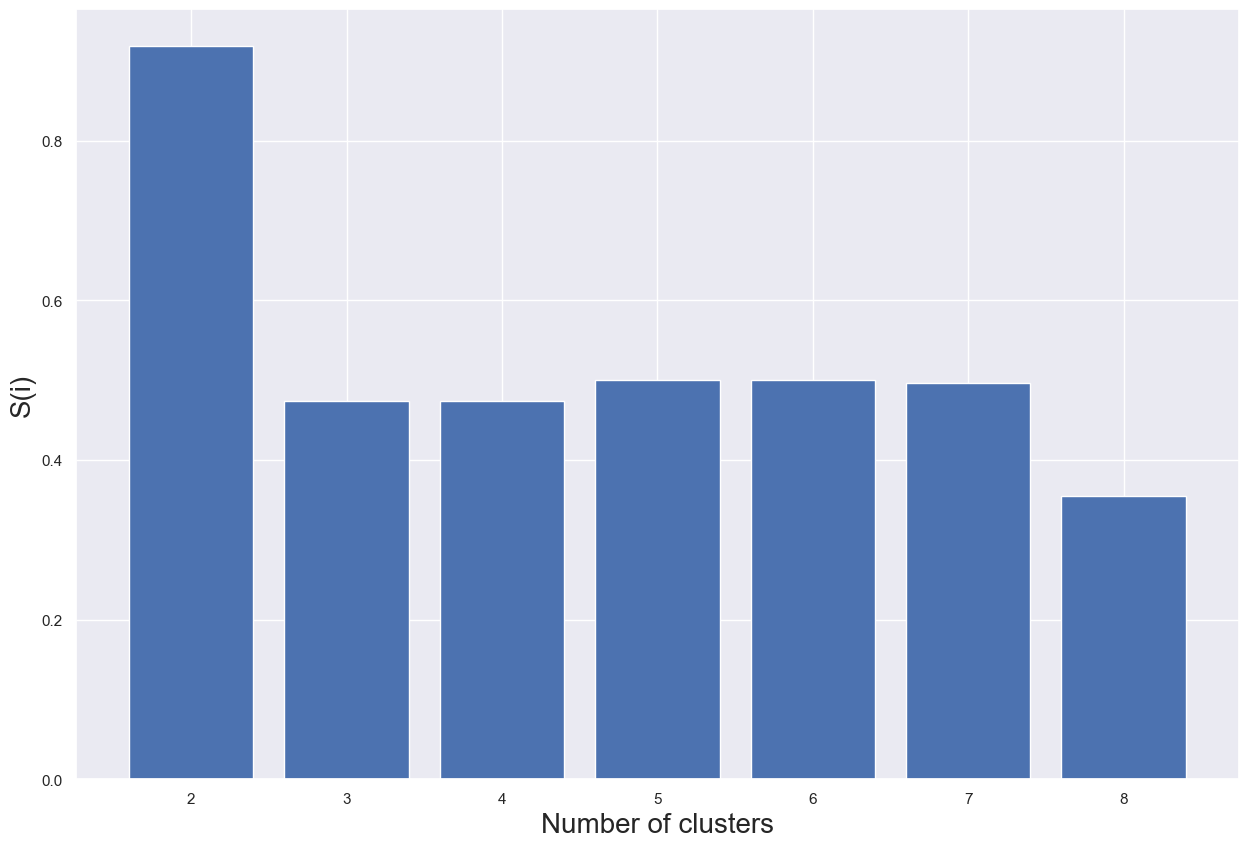

In [27]:
# Plotting a bar graph to compare the results
plt.figure(figsize =(15, 10))
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [28]:
num_clusters =  2

agg_clustering = AgglomerativeClustering(n_clusters=num_clusters )  # Adjust distance_threshold as needed
cluster_labels = agg_clustering.fit_predict(X)

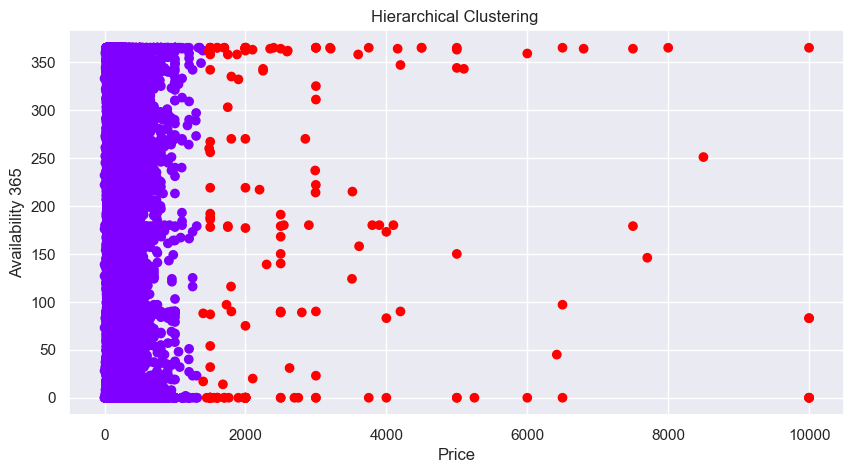

In [29]:
# Visualizing the clustering
plt.figure(figsize =(10, 5))
plt.scatter(X['price'], X['availability_365'],
           c = cluster_labels, cmap ='rainbow')

plt.xlabel('Price')
plt.ylabel('Availability 365')
plt.title('Hierarchical Clustering ')
plt.show()

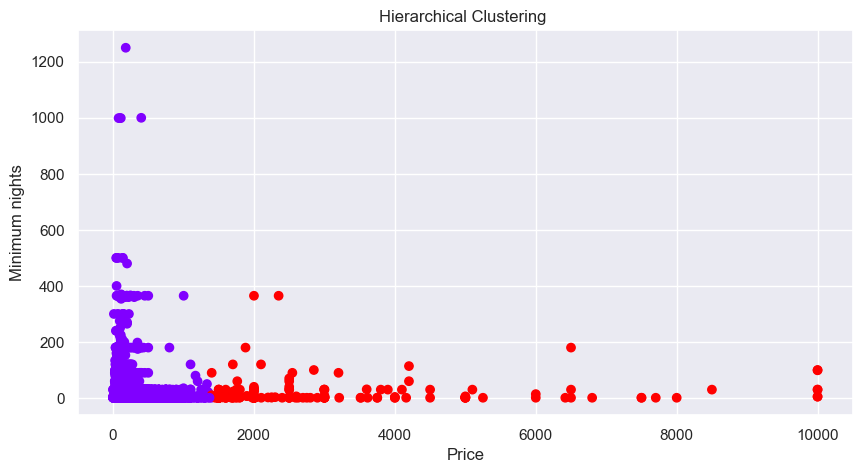

In [30]:
# Visualizing the clustering
plt.figure(figsize =(10, 5))
plt.scatter(X['price'], X['minimum_nights'],
           c = cluster_labels, cmap ='rainbow')

plt.xlabel('Price')
plt.ylabel('Minimum nights')
plt.title('Hierarchical Clustering ')

plt.show()